In [1]:
# For web scrapping
# from bing_image_downloader import downloader
# downloader.download('Mild Diabetic Reinopathy', limit=30, output_dir='Dataset', adult_filter_off=True)

In [5]:
# for knowing the execution time
# !pip install ipython_autotime
# %load_ext autotime

time: 0 ns (started: 2023-08-27 10:30:30 +05:30)


Preprocessing

1. Resize
2. Flattening

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# flatten is used to convert Matrix to Vector
target = []
images = []
flat_data = []

DATADIR = 'colored_images'
CATEGORIES = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category)   # Label Encoding the values
    path = os.path.join(DATADIR,category)  # Create path to use all the images
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        # print(img_array.shape)
        # plt.imshow(img_array)
        img_resize = resize(img_array, (150,150,3))       # Normalizes the value from 0 to 1
        flat_data.append(img_resize.flatten())            # flatten is used to convert Matrix to Vector
        images.append(img_resize)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 3.16 s (started: 2023-08-27 10:59:52 +05:30)


In [31]:
len(flat_data[0])

67500

time: 0 ns (started: 2023-08-27 11:02:23 +05:30)


In [30]:
150*150*3

67500

time: 0 ns (started: 2023-08-27 11:02:12 +05:30)


In [33]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

time: 15 ms (started: 2023-08-27 11:02:37 +05:30)


<BarContainer object of 5 artists>

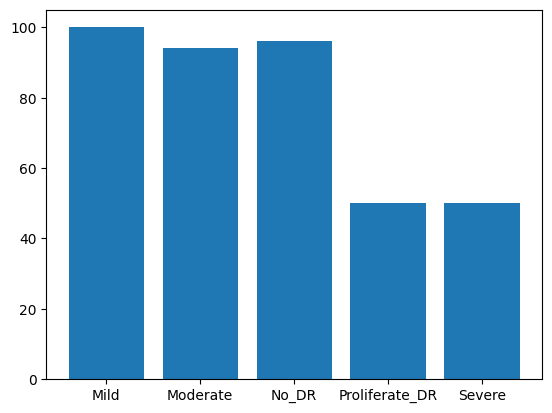

time: 109 ms (started: 2023-08-27 11:05:56 +05:30)


In [39]:
unique,count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES,count)

Split data into Training and testing

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(flat_data, target, test_size=0.3, random_state=109)

time: 78 ms (started: 2023-08-27 11:15:39 +05:30)


In [42]:
# SVC - Support Vector Classifier
# SVM - Support Vector Machine
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
    {'C': [1,10,100,1000], 'kernel':['linear']},
    {'C': [1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 16min 21s (started: 2023-08-27 11:24:52 +05:30)


In [43]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 3, 2, 0, 0, 3, 2,
       2, 2, 1, 0, 2, 2, 0, 0, 2, 3, 1, 3, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2,
       2, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 2, 3, 2, 0, 1, 0, 2, 0, 2, 0, 3,
       1, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 4, 2, 2,
       0, 1, 2, 0, 1, 0, 3, 1, 0, 3, 1, 1, 1, 1, 0, 0, 0, 2, 3, 3, 0, 0,
       0, 1, 2, 0, 0, 2, 1])

time: 2.5 s (started: 2023-08-27 11:41:27 +05:30)


In [44]:
y_test

array([2, 4, 2, 0, 0, 1, 1, 0, 3, 0, 0, 0, 3, 4, 1, 1, 1, 2, 1, 0, 3, 2,
       2, 2, 3, 1, 0, 2, 0, 4, 2, 2, 3, 2, 1, 0, 1, 1, 4, 0, 0, 2, 1, 2,
       2, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 4, 4, 2, 0, 2, 4, 1,
       1, 0, 1, 3, 0, 2, 1, 3, 1, 2, 0, 1, 1, 2, 3, 2, 1, 2, 2, 4, 2, 2,
       0, 1, 0, 0, 2, 1, 3, 4, 0, 0, 1, 4, 2, 2, 0, 4, 0, 2, 4, 0, 1, 1,
       1, 3, 2, 0, 3, 2, 2])

time: 16 ms (started: 2023-08-27 11:41:32 +05:30)


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.5384615384615384

time: 0 ns (started: 2023-08-27 11:41:34 +05:30)


In [46]:
confusion_matrix(y_pred, y_test)

array([[22, 12,  0,  4,  6],
       [ 3, 13,  6,  5,  4],
       [ 3,  1, 24,  0,  0],
       [ 3,  3,  3,  3,  1],
       [ 0,  0,  0,  0,  1]], dtype=int64)

time: 16 ms (started: 2023-08-27 11:41:40 +05:30)


Save the Model

In [47]:
import pickle
pickle.dump(clf, open('DB_model.p', 'wb'))

time: 188 ms (started: 2023-08-27 11:41:45 +05:30)


In [48]:
model = pickle.load(open('DB_model.p','rb'))

time: 78 ms (started: 2023-08-27 11:41:50 +05:30)


(128, 128, 3)
Predicted Output: Severe


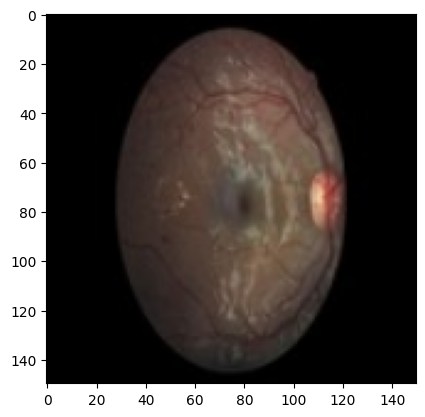

time: 203 ms (started: 2023-08-27 11:53:28 +05:30)


In [57]:
# Testing a brand new Image
flat_data = []
img = imread('SDR.jpg')
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)

if y_out == 0:
    predicted_output = 'Mild'
elif y_out == 1:
    predicted_output = 'Moderate'
elif y_out == 2:
    predicted_output = 'No_DR'
elif y_out == 3:
    predicted_output = 'Proliferate_DR'
else:
    predicted_output = 'Severe'

print(f"Predicted Output: {predicted_output}")